Importing Relevant Libraries:

In [ ]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np
import re

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing data:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ONGO.csv to ONGO (3).csv


In [ ]:
import io
data_ongo = pd.read_csv(io.BytesIO(uploaded['ONGO.csv']))

In [ ]:
data_ongo['source'] = 'ongo'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweet.csv to tweet (3).csv


In [ ]:
import io
data_tweet = pd.read_csv(io.BytesIO(uploaded['tweet.csv']))

In [ ]:
data_tweet['source'] = 'tweet'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving reddit.csv to reddit (2).csv


In [ ]:
import io
data_reddit = pd.read_csv(io.BytesIO(uploaded['reddit.csv']))

In [ ]:
data_reddit['source']='reddit'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.csv to kaggle (2).csv


In [ ]:
import io
data_kaggle = pd.read_csv(io.BytesIO(uploaded['kaggle.csv']))

In [ ]:
data_kaggle['source'] = 'kaggle'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving evaluation_API_2.csv to evaluation_API_2 (1).csv


In [ ]:
import io
data_youtube = pd.read_csv(io.BytesIO(uploaded['evaluation_API_2.csv']),sep=",", header=None)

In [ ]:
data_youtube['source']='youtube'
data_youtube.columns = ["text", "extra", "source"]
data_youtube

,text,extra,source
0,"First Class with you, Very good session👏.. Bea...",NaN,youtube
1,Wonderful practice. You are a great teacher,NaN,youtube
2,tq so much sir,NaN,youtube
3,Thanks jai master for giving such a wonderful ...,NaN,youtube
4,Thank u namaste🙏,NaN,youtube
...,...,...,...
399,fuck you you pussy ass hater go suck a dick an...,NaN,youtube
400,"Send those illegal asshole crazy muslims, wetb...",NaN,youtube
401,common girl suck my dick.,NaN,youtube
402,did your mama move like this before she was ra...,NaN,youtube


In [ ]:
df = pd.concat([data_ongo, data_tweet, data_reddit, data_kaggle, data_youtube])

In [ ]:
df

,text,source,hate,offensive,ok,extra
0,Hello!,ongo,NaN,NaN,NaN,NaN
1,Gotta get those zzzs!,ongo,NaN,NaN,NaN,NaN
2,go!,ongo,NaN,NaN,NaN,NaN
3,go ongo go,ongo,NaN,NaN,NaN,NaN
4,"Hey, can't wait to release the new version. Ne...",ongo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
399,fuck you you pussy ass hater go suck a dick an...,youtube,NaN,NaN,NaN,NaN
400,"Send those illegal asshole crazy muslims, wetb...",youtube,NaN,NaN,NaN,NaN
401,common girl suck my dick.,youtube,NaN,NaN,NaN,NaN
402,did your mama move like this before she was ra...,youtube,NaN,NaN,NaN,NaN


# Getting sense of data:

In [ ]:
data_reddit.head(5)

,text,hate,offensive,ok,source
0,go back to your castle you capitalist scum htt...,1,0,0,reddit
1,i found her here http perfectredheads tumblr c...,1,0,0,reddit
2,this slut gonna fuck with all http righpatcour...,1,0,0,reddit
3,this girl gonna go into on your knees open her...,1,0,0,reddit
4,attention reddit mods http www youtube com wat...,1,0,0,reddit


In [ ]:
data_tweet.head(5)

,text,hate,offensive,ok,source
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0,1,tweet
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1,0,tweet
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,1,0,tweet
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,1,0,tweet
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,1,0,tweet


In [ ]:
data_ongo.head(5)

,text,source
0,Hello!,ongo
1,Gotta get those zzzs!,ongo
2,go!,ongo
3,go ongo go,ongo
4,"Hey, can't wait to release the new version. Ne...",ongo


In [ ]:
data_kaggle.head(5)

,text,hate,offensive,ok,source
0,Explanation\nWhy the edits made under my usern...,0,0,1,kaggle
1,D'aww! He matches this background colour I'm s...,0,0,1,kaggle
2,"Hey man, I'm really not trying to edit war. It...",0,0,1,kaggle
3,"""\nMore\nI can't make any real suggestions on ...",0,0,1,kaggle
4,"You, sir, are my hero. Any chance you remember...",0,0,1,kaggle


# Tokenization using NLTK:

In [ ]:
import re
def clean_text(text):
    #text = text.lower()
    text = re.sub(r"what's","what is", text)
    text = re.sub(r"rt", '',text)
    text = re.sub(r"\'ve","have", text)
    text = re.sub(r"can't","cannot",text)
    text = re.sub(r"n't", "not", text)
    text = re.sub(r"i'm","i am", text)
    text = re.sub(r"\'re'","are", text)
    text = re.sub(r"\'d'","would",text)
    text = re.sub(r"\'ll'", "will", text)
    text = re.sub(r"\'scuse'", "excuse", text)
    text = re.sub("\W",' ', text)
    text = re.sub('\s+',' ',text)
    text = text.strip(' ')
    text = re.sub(" \d+", " ", text)
    return text
#data_ongo['cmt'] = data_ongo['text'].map(lambda x: clean_text(x))
#data_reddit['cmt'] = data_reddit['text'].map(lambda x: clean_text(x))
#data_tweet['cmt'] = data_tweet['text'].map(lambda x: clean_text(x))
#data_kaggle['cmt'] = data_kaggle['text'].map(lambda x: clean_text(x))
df['cmt'] = df['text'].map(lambda x: clean_text(x))

#tokens_ongo=[nltk.word_tokenize(words) for words in data_ongo['cmt']]
#tokens_reddit=[nltk.word_tokenize(words) for words in data_reddit['cmt']]
#tokens_tweet=[nltk.word_tokenize(words) for words in data_tweet['cmt']]
#tokens_kaggle=[nltk.word_tokenize(words) for words in data_kaggle['cmt']]
tokens=[nltk.word_tokenize(words) for words in df['cmt']]

print(tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
data_ongo['cmt'] = data_ongo['text'].map(lambda x: clean_text(x))
data_reddit['cmt'] = data_reddit['text'].map(lambda x: clean_text(x))
data_tweet['cmt'] = data_tweet['text'].map(lambda x: clean_text(x))
data_youtube['cmt'] = data_youtube['text'].map(lambda x: clean_text(x))

In [ ]:
data_kaggle['cmt'] = data_kaggle['text'].map(lambda x: clean_text(x))

In [ ]:
tokens_ongo=[nltk.word_tokenize(words) for words in data_ongo['cmt']]
tokens_reddit=[nltk.word_tokenize(words) for words in data_reddit['cmt']]
tokens_tweet=[nltk.word_tokenize(words) for words in data_tweet['cmt']]
tokens_youtube=[nltk.word_tokenize(words) for words in data_youtube['cmt']]

In [ ]:
tokens_kaggle=[nltk.word_tokenize(words) for words in data_kaggle['cmt']]

In [ ]:
print(tokens_ongo[:3])

[['Hello'], ['Got', 'ta', 'get', 'those', 'zzzs'], ['go']]


**Word2Vec & PCA:**

In [ ]:
#model_ongo = Word2Vec(tokens_ongo,size=70,sg=1,min_count=3)
#model_reddit = Word2Vec(tokens_reddit,size=70,sg=1,min_count=3)
#model_tweet = Word2Vec(tokens_tweet,size=70,sg=1,min_count=3)
#model_kaggle = Word2Vec(tokens_kaggle,size=70,sg=1,min_count=3)
model_df = Word2Vec(tokens,size=70,sg=1,min_count=3)




In [ ]:
model_df.wv.vocab

{'Hello': <gensim.models.keyedvectors.Vocab at 0x7f1a9067f898>,
 'Got': <gensim.models.keyedvectors.Vocab at 0x7f1a9067f908>,
 'ta': <gensim.models.keyedvectors.Vocab at 0x7f1a133b09e8>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0a90>,
 'those': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0ac8>,
 'go': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0b00>,
 'Hey': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0b38>,
 'can': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0b70>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0ba8>,
 'wait': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0be0>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0c18>,
 'release': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0c50>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0c88>,
 'new': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0cc0>,
 'version': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0cf8>,
 'should': <gensim.models.keyedvectors.Vocab at 0x7f1a133b0d

In [ ]:
#model_ongo = Word2Vec(tokens_ongo,size=70,sg=1,min_count=3)
#model_reddit = Word2Vec(tokens_reddit,size=70,sg=1,min_count=3)
#model_tweet = Word2Vec(tokens_tweet,size=70,sg=1,min_count=3)
#model_tweet = Word2Vec(tokens_tweet,size=70,sg=1,min_count=3)

Further, we will store all the word vectors in the data frame with 70 dimensions and use this data frame for PCA.

In [ ]:
def List(list):
  """making a list from all lists and sublists"""
  L = []
  for i in list:
    for j in i:
      L.append(j)
  return L

In [ ]:


words_ongo=List(tokens_ongo)
words_reddit=List(tokens_reddit)
words_tweet=List(tokens_tweet)
words_kaggle=List(tokens_kaggle)
words_youtube=List(tokens_youtube)
words = list(model_df.wv.vocab)

print(words_ongo)

['Hello', 'Got', 'ta', 'get', 'those', 'zzzs', 'go', 'go', 'ongo', 'go', 'Hey', 'can', 'not', 'wait', 'to', 'release', 'the', 'new', 'version', 'Newsfeed', 'should', 'get', 'come', 'alive', 'with', 'photos', 'Good', 'job', 'Hahaha', 'finding', 'bugs', 'is', 'progress', 'That', 's', 'a', 'scenic', 'workout', 'spot', 'lol', 'That', 'looks', 'fun', 'That', 's', 'a', 'really', 'good', 'idea', 'Whoa', 'That', 's', 'awesome', 'guys', 'Yeah', 'I', 'decided', 'to', 'run', 'and', 'do', 'some', 'strength', 'training', 'for', 'fun', 'day', 'Oooh', 'nice', 'Looks', 'like', 'we', 'found', 'another', 'bug', 'Nice', 'Keep', 'it', 'going', 'Wow', 'nice', 'that', 's', 'awesome', 'Almost', 'there', 'Nice', 'gainz', 'adding', 'a', 'new', 'comment', 'Got', 'ta', 'get', 'those', 'gainz', 'Yeah', 'I', 'usually', 'dread', 'them', 'but', 'it', 's', 'not', 'so', 'bad', 'if', 'you', 're', 'only', 'doing', 'it', 'for', 'seconds', 'I', 'm', 'savoring', 'the', 'last', 'sessions', 'of', 'this', 'program', 'She', 's

In [ ]:
def M(list, words):
  """check if the word is in list of words"""
  L=[]
  for i in list:
    if i not in words:
      pass
    else:
      L.append(i)
  return L

In [ ]:
words_ongo2 = M(words_ongo, words)
words_reddit2 = M(words_reddit, words)
words_tweet2 = M(words_tweet, words)


In [ ]:
words_kaggle2 = M(words_kaggle, words)
words_youtube2 = M(words_youtube, words)

In [ ]:
X_ongo=model_df[words_ongo2] 
X_reddit=model_df[words_reddit2]
X_tweet=model_df[words_tweet2]
X_kaggle=model_df[words_kaggle2]
X_youtube=model_df[words_youtube2]
X_df=model_df[model_df.wv.vocab]
#x_ongo_tweet = model_tweet[model_tweet.wv.vocab]

df_ongo=pd.DataFrame(X_ongo)
df_reddit=pd.DataFrame(X_reddit)
df_tweet=pd.DataFrame(X_tweet)
df_youtube=pd.DataFrame(X_youtube)
df_kaggle=pd.DataFrame(X_kaggle)
df_all = pd.DataFrame(X_df)


#print(df_ongo.head(5))
#df_reddit


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWa

In [ ]:
print(df_reddit.shape, df_kaggle.shape)

(302818, 70) (10617003, 70)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,-0.117100,0.723977,0.052122,-0.245777,-0.107950,-0.208457,-0.017805,0.008095,0.379491,0.288221,-0.029914,0.077004,-0.396642,-0.031168,0.105608,0.308595,-0.039803,-0.550745,-0.018775,0.254332,0.414000,0.064494,-0.044071,0.476433,0.639079,0.459955,0.040031,0.728045,0.107711,-0.022032,-0.311108,0.000478,-0.017667,-0.002337,0.173325,0.009662,0.302661,0.023601,0.110236,-0.299448,0.042699,0.152873,0.158154,0.049628,-0.014228,-0.034900,-0.042692,-0.015433,-0.054146,-0.079090,0.411338,-0.012429,0.418711,0.006437,-0.056013,0.033562,0.090813,-0.132228,0.091046,-0.110742,0.102088,-0.011696,-0.012471,0.134459,-0.051611,-0.063309,-0.455598,-0.243014,-0.128800,0.014980
1,-0.112543,0.103514,0.007941,0.107033,0.438267,0.148372,0.053482,0.000434,-0.000250,0.128868,0.128380,0.023705,0.013073,-0.021636,0.071549,-0.346920,0.010775,0.027387,-0.041596,0.120490,-0.012576,0.244903,0.002588,0.006800,0.299171,-0.060260,0.063872,-0.011597,0.195899,-0.023398,-0.156005,-0.048127,0.057844,-0.136460,-0.045663,-0.061307,0.166618,0.009754,0.096076,-0.379497,0.156064,0.028591,-0.076398,0.060593,0.252993,-0.086694,-0.044289,0.041654,-0.000290,-0.028149,-0.035715,0.012174,-0.109617,0.009521,-0.077920,-0.004553,-0.015063,-0.023674,-0.055782,0.222640,0.042838,0.060888,0.206363,-0.024012,-0.001379,-0.001789,0.004522,-0.014272,0.001146,0.042729
2,0.071675,-0.157223,-0.168090,0.023780,0.495902,0.136296,0.124203,-0.122783,0.013687,0.237538,-0.287886,0.018614,-0.048125,0.022179,-0.037035,0.086579,0.029395,-0.076583,0.206568,0.220855,0.067568,0.304002,0.051871,0.080047,0.158845,0.003993,-0.211441,0.004805,0.059025,0.006940,-0.023271,0.056422,0.085671,-0.158294,0.137341,-0.011961,0.004346,-0.043232,-0.076272,-0.058323,0.091911,-0.019927,-0.144642,-0.037595,-0.010026,0.032006,0.067424,0.021311,0.016195,0.067058,0.032962,0.005284,0.335514,-0.044139,0.204570,-0.247263,0.035683,0.014865,0.010068,0.459454,-0.008537,0.073460,0.040761,-0.009303,-0.033721,-0.244851,0.172243,0.239660,0.077834,-0.093239
3,0.012061,-0.006907,0.019246,0.020099,0.516290,0.020071,0.021857,-0.048624,-0.086675,-0.027640,0.116235,0.083736,0.051940,0.100914,0.002284,0.031655,-0.028279,-0.043660,0.009075,0.295486,-0.030450,0.190110,0.122993,0.200532,0.074402,0.215345,0.106774,-0.140979,-0.015442,0.193328,0.277991,-0.030265,0.003196,-0.003362,0.310600,-0.126124,0.125715,0.014329,-0.024603,0.024801,-0.076983,-0.001490,0.120528,0.061773,0.122914,0.069221,-0.009213,-0.118999,0.017315,-0.038601,0.004944,0.053245,0.024207,0.003260,0.390953,0.090054,0.011102,-0.074084,-0.071448,0.093774,0.102551,0.293429,-0.363630,0.017440,0.003600,0.010025,-0.080688,0.108370,0.038292,0.009061
4,-0.016402,0.055619,0.040346,0.001076,0.137801,0.002723,-0.009089,-0.014687,0.017738,-0.023439,0.148184,-0.003058,-0.024407,0.043223,0.172285,0.015993,0.018587,-0.104919,-0.000961,-0.028949,0.028287,0.062478,0.118866,-0.056539,0.172111,0.003133,0.054208,-0.013725,0.020374,-0.020135,-0.006241,-0.001398,-0.010397,0.064290,-0.012431,0.001309,0.599045,0.024472,-0.012040,0.000542,-0.053966,0.352608,0.058551,-0.033420,-0.003147,-0.019244,-0.002547,0.426173,-0.020170,0.011868,-0.008843,0.065382,0.072742,0.011518,0.547054,-0.009099,0.161271,0.123690,0.109491,0.154772,0.037814,0.152347,0.523697,-0.041018,0.100837,-0.015716,0.004524,0.025332,0.301512,0.017251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
np.sum(np.dot(X_reddit,np.linalg.pinv(X_ongo)))


NameError: ignored

Implementing PCA using the numpy library

In [ ]:
#Computing the correlation matrix
X_corr=df_all.corr()


#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]


#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X_df,new_vectors)


In [ ]:
#Computing the correlation matrix
X_corr_ongo=df_ongo.corr()
X_corr_reddit=df_reddit.corr()
X_corr_tweet=df_tweet.corr()
X_corr_kaggle=df_kaggle.corr()
X_corr_youtube=df_youtube.corr()

#Computing eigen values and eigen vectors
values_ongo,vectors_ongo=np.linalg.eig(X_corr_ongo)
values_reddit,vectors_reddit=np.linalg.eig(X_corr_reddit)
values_tweet,vectors_tweet=np.linalg.eig(X_corr_tweet)
values_kaggle,vectors_kaggle=np.linalg.eig(X_corr_kaggle)
values_youtube,vectors_youtube=np.linalg.eig(X_corr_youtube)

#Sorting the eigen vectors coresponding to eigen values in descending order
args_ongo = (-values_ongo).argsort()
values_ongo = vectors_ongo[args_ongo]
vectors_ongo = vectors_ongo[:, args_ongo]

args_reddit = (-values_reddit).argsort()
values_reddit = vectors_reddit[args_reddit]
vectors_reddit = vectors_reddit[:, args_reddit]

args_tweet = (-values_tweet).argsort()
values_tweet = vectors_tweet[args_tweet]
vectors_tweet = vectors_tweet[:, args_tweet]

args_kaggle = (-values_kaggle).argsort()
values_kaggle = vectors_kaggle[args_kaggle]
vectors_kaggle = vectors_kaggle[:, args_kaggle]

args_youtube = (-values_youtube).argsort()
values_youtube = vectors_youtube[args_youtube]
vectors_youtube = vectors_youtube[:, args_youtube]
#Taking first 2 components which explain maximum variance for projecting
new_vectors_ongo=vectors_ongo[:,:2]
new_vectors_reddit=vectors_reddit[:,:2]
new_vectors_tweet=vectors_tweet[:,:2]
new_vectors_kaggle=vectors_kaggle[:,:2]
new_vectors_youtube=vectors_youtube[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X_ongo=np.dot(X_ongo,new_vectors_ongo)
neww_X_reddit=np.dot(X_reddit,new_vectors_reddit)
neww_X_tweet=np.dot(X_tweet,new_vectors_tweet)
neww_X_kaggle=np.dot(X_kaggle,new_vectors_kaggle)
neww_X_youtube=np.dot(X_youtube,new_vectors_youtube)

In [ ]:
print(words_ongo)

['Hello', 'Got', 'ta', 'get', 'those', 'zzzs', 'go', 'go', 'ongo', 'go', 'Hey', 'can', 'not', 'wait', 'to', 'release', 'the', 'new', 'version', 'Newsfeed', 'should', 'get', 'come', 'alive', 'with', 'photos', 'Good', 'job', 'Hahaha', 'finding', 'bugs', 'is', 'progress', 'That', 's', 'a', 'scenic', 'workout', 'spot', 'lol', 'That', 'looks', 'fun', 'That', 's', 'a', 'really', 'good', 'idea', 'Whoa', 'That', 's', 'awesome', 'guys', 'Yeah', 'I', 'decided', 'to', 'run', 'and', 'do', 'some', 'strength', 'training', 'for', 'fun', 'day', 'Oooh', 'nice', 'Looks', 'like', 'we', 'found', 'another', 'bug', 'Nice', 'Keep', 'it', 'going', 'Wow', 'nice', 'that', 's', 'awesome', 'Almost', 'there', 'Nice', 'gainz', 'adding', 'a', 'new', 'comment', 'Got', 'ta', 'get', 'those', 'gainz', 'Yeah', 'I', 'usually', 'dread', 'them', 'but', 'it', 's', 'not', 'so', 'bad', 'if', 'you', 're', 'only', 'doing', 'it', 'for', 'seconds', 'I', 'm', 'savoring', 'the', 'last', 'sessions', 'of', 'this', 'program', 'She', 's

'\nfor i, word in enumerate(words_tweet2):\n  if word in words:\n    if neww_X_tweet[i,0] >2.5:\n        plt.annotate(word,xy=(neww_X_tweet[i,0],neww_X_tweet[i,1]))\nfor i, word in enumerate(words_kaggle2):\n  if word in words:\n    if neww_X_kaggle[i,0]<-4:\n        plt.annotate(word,xy=(neww_X_kaggle[i,0],neww_X_kaggle[i,1]))\n\nfor i, word in enumerate(words_kaggle2):\n  if word in words:\n    if neww_X_kaggle[i,0]<-4:\n        plt.annotate(word,xy=(neww_X_kaggle[i,0],neww_X_kaggle[i,1]))'

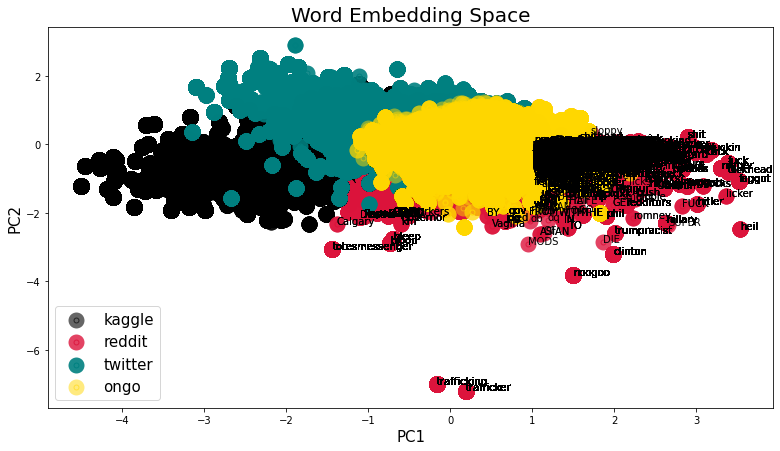

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X_kaggle[:,0],neww_X_kaggle[:,1],linewidths=10,color='black', alpha=0.6)
plt.scatter(neww_X_reddit[:,0],neww_X_reddit[:,1],linewidths=10,color='crimson', alpha=0.8)
plt.scatter(neww_X_tweet[:,0],neww_X_tweet[:,1],linewidths=10,color='teal',alpha=0.9)
plt.scatter(neww_X_ongo[:,0],neww_X_ongo[:,1],linewidths=10,color='gold',alpha=0.5)
#plt.scatter(neww_X_youtube[:,0],neww_X_youtube[:,1],linewidths=10,color='blue',alpha=0.5)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.legend(['kaggle','reddit','twitter', 'ongo'], loc=3,prop={'size': 15}) 
plt.title("Word Embedding Space",size=20)
#vocab=list(model_df.wv.vocab)

for i, word in enumerate(words_reddit2):
  if word in words:
    if neww_X_reddit[i,1] <-2 or neww_X_reddit[i,0]>1:
      plt.annotate(word,xy=(neww_X_reddit[i,0],neww_X_reddit[i,1]))
"""
for i, word in enumerate(words_tweet2):
  if word in words:
    if neww_X_tweet[i,0] >2.5:
        plt.annotate(word,xy=(neww_X_tweet[i,0],neww_X_tweet[i,1]))
for i, word in enumerate(words_kaggle2):
  if word in words:
    if neww_X_kaggle[i,0]<-4:
        plt.annotate(word,xy=(neww_X_kaggle[i,0],neww_X_kaggle[i,1]))

for i, word in enumerate(words_kaggle2):
  if word in words:
    if neww_X_kaggle[i,0]<-4:
        plt.annotate(word,xy=(neww_X_kaggle[i,0],neww_X_kaggle[i,1]))"""

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

In [ ]:
vectors_reddit.shape

(70, 70)

In [ ]:
get_cosine_similarity(X_kaggle,X_ongo)

ValueError: ignored

In [ ]:
get_cosine_similarity(vectors_youtube,vectors_ongo)

-0.012663514746061508

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,-0.017326,-0.289433,0.219794,0.258269,-0.719187,-0.361834,0.404584,0.144813,-0.245951,-0.289500,0.556806,0.236117,-0.543539,-0.367005,-0.138070,-0.086588,-0.163442,0.422896,-0.615033,-0.078983,0.340720,0.013624,0.364976,0.656653,0.052974,0.489355,0.282180,0.136212,0.022246,0.781206,-0.443843,0.436680,0.646207,-0.689660,0.086703,0.080318,-0.253574,-0.959493,-0.014410,-0.688606,-0.044208,0.032805,0.313240,-0.630233,-0.167308,0.821307,0.929634,-0.091650,0.594299,0.869029,0.578187,-0.400492,0.565362,0.852662,0.505654,0.486951,0.201013,0.418660,0.051434,0.009425,0.342528,0.889786,0.546656,-0.133396,1.180187,0.416984,0.133419,-0.430161,0.639327,0.841878
1,-0.340207,-0.397933,-0.566564,0.236104,0.342669,0.662655,-0.542153,-0.359370,0.206940,-0.404742,-0.242803,0.078415,-0.402087,0.275360,0.033081,0.074682,0.569863,-0.056961,-0.055420,0.482280,-0.160132,-0.198023,0.014412,0.099332,0.089199,0.388381,-0.288473,-0.798971,0.150829,0.555026,-0.233646,0.247922,0.061660,-0.134524,0.854051,-0.416762,-0.573128,-0.368201,-0.581849,-0.258775,0.328814,0.370037,-0.184344,-0.595703,-0.162696,-0.301570,0.097315,-0.442200,-0.558652,0.501225,0.572882,0.078860,0.418609,0.530988,-0.169870,0.182100,-0.086047,0.084863,0.183193,0.067292,0.139597,-0.270371,0.201798,0.093630,0.322984,0.045841,-0.588315,-0.189859,0.639780,0.444826
2,-0.145351,-0.905047,-1.014651,-0.109082,0.426608,0.415841,-0.174165,-0.285740,-0.602667,-0.208350,-0.210028,0.241450,-0.111855,0.146640,0.078988,0.650986,0.702607,0.093490,0.383821,0.808982,-0.131721,-0.012354,0.011863,0.236320,0.430571,-0.064069,-0.223064,-0.831336,-0.116503,0.732999,-0.254271,0.609787,0.100594,0.338106,1.067165,-0.566772,-0.361563,-0.196810,-1.177805,-0.422579,0.343501,0.801670,0.231187,-0.912094,-0.056704,-0.309300,-0.148035,-0.309967,-0.329096,0.192079,0.158629,-0.051364,1.117627,0.279517,0.172463,0.509210,-0.589653,0.406234,0.256038,0.001210,0.098889,0.209958,-0.056427,-0.387597,-0.163229,0.040456,-1.068377,-0.426298,0.658032,0.217779
3,-0.454908,-0.004154,-0.296913,-0.060663,0.362487,0.114196,0.208285,-0.628993,-0.335320,-0.091754,-0.369443,-0.092666,-0.611502,-0.154579,-0.035565,0.366783,-0.250129,-0.319216,0.101636,0.371226,-0.232194,-0.410839,0.253287,-0.161590,0.369717,0.531000,-0.215000,-0.300067,-0.044837,-0.062285,0.317926,0.226783,0.046701,0.167531,-0.191250,0.015661,-0.521781,-0.534377,-0.318370,-0.313325,0.091604,0.244138,0.053619,-0.386468,-0.573572,-0.430301,0.308134,-0.338430,-0.071154,0.170482,0.377334,-0.389738,0.393939,0.277751,0.117251,0.355471,0.372599,0.318999,0.146739,0.253080,0.439738,-0.024334,-0.240419,0.806567,0.384460,-0.336678,-0.516218,0.363327,0.406718,0.284796
4,-0.290996,0.140046,-0.171693,-0.307025,-0.016781,-0.244224,0.397617,-0.233741,0.177926,-0.312463,-0.572198,0.383456,0.254205,-0.112079,-0.415594,0.655662,-0.440010,0.372769,0.105684,0.434947,-0.303075,-0.089494,-0.064298,-0.105194,0.740375,0.230194,-0.146234,0.025477,-0.129182,-0.265337,0.544080,0.721076,0.038383,0.125088,-0.115192,-0.595490,-0.123451,-0.134617,0.191164,-0.436199,0.069380,-0.061639,0.216310,-0.395165,-0.404092,-0.005433,-0.377204,-0.595401,0.033319,-0.290073,0.408368,-0.034754,0.073277,0.404109,0.145065,0.211820,0.427705,-0.098413,0.520147,-0.238971,-0.331985,0.275693,0.254560,0.445151,0.033497,0.040423,-0.415187,0.421158,0.069362,0.270477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82512,-0.010539,-0.022247,-0.079349,0.024784,-0.005166,-0.137209,-0.046403,-0.071802,-0.105737,-0.066570,-0.065662,0.080196,-0.159775,0.047286,0.006643,0.036330,0.084716,0.090043,0.078287,0.0

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
#plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
#plt.scatter(neww_X_reddit[:,0],neww_X_reddit[:,1],linewidths=10,color='red')
#plt.scatter(neww_X_tweet[:,0],neww_X_tweet[:,1],linewidths=10,color='teal')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model_df.wv.vocab)
#for i, word in enumerate(vocab):
#  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
groups = df2.groupby("source")
for name, group in groups:
    plt.plot(group[neww_X[:,0]], group[neww_X[:,0]], marker="o", linestyle="", label=name)
plt.legend()
for i, word in enumerate(vocab_tweet):
  if word == 'shit':
      plt.annotate(word,xy=(neww_X_tweet[i,0],neww_X_tweet[i,1]))

NameError: ignored

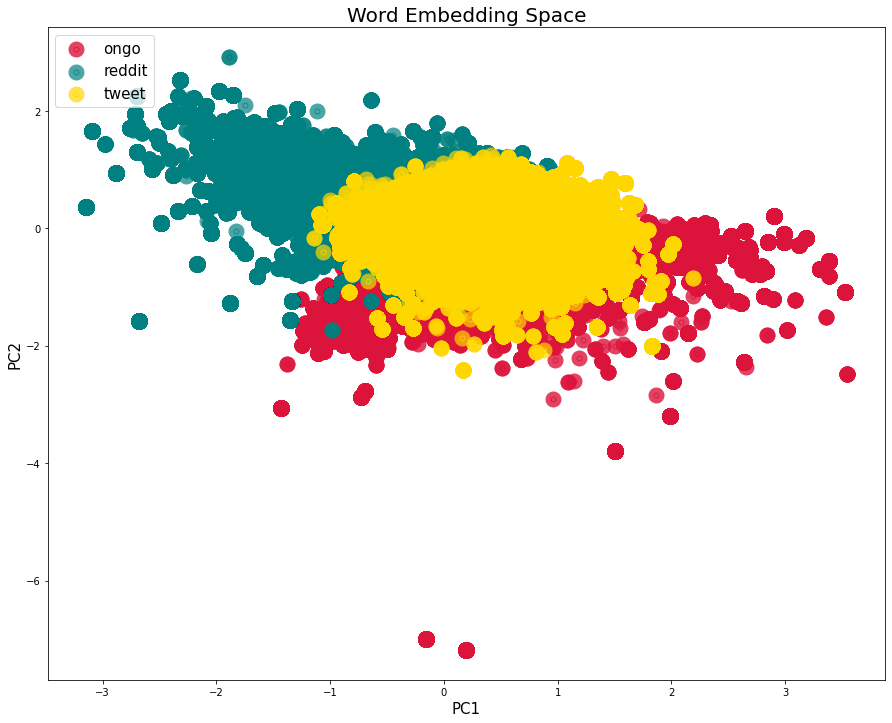

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.scatter(neww_X_reddit[:,0],neww_X_reddit[:,1],linewidths=10,color='crimson', alpha=0.8)
plt.scatter(neww_X_tweet[:,0],neww_X_tweet[:,1],linewidths=10,color='teal',alpha=0.7)
#plt.scatter(neww_X_kaggle[:,0],neww_X_kaggle[:,1],linewidths=10,color='gold', alpha=0.5)
plt.scatter(neww_X_ongo[:,0],neww_X_ongo[:,1],linewidths=10,color='gold',alpha=0.7)

plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
plt.legend(['ongo','reddit','tweet', 'kaggle'], loc=2,prop={'size': 15}) 
vocab=list(model_kaggle.wv.vocab)
vocab_tweet=list(model_tweet.wv.vocab)
vocab_reddit=list(model_reddit.wv.vocab)

#for i, word in enumerate(vocab):
#  if word == 'shit':
#      plt.annotate(word,xy=(neww_X_kaggle[i,0],neww_X_kaggle[i,1]))

for i, word in enumerate(vocab_reddit):
  if word == 'shit':
      plt.annotate(word,xy=(neww_X_reddit[i,0],neww_X_reddit[i,1]))


for i, word in enumerate(vocab_tweet):
  if word == 'shit':
      plt.annotate(word,xy=(neww_X_tweet[i,0],neww_X_tweet[i,1]))